# Installing Required Qiskit Packages

In [1]:
# %pip install qiskit
# %pip install qiskit-ibm-runtime
# %pip install qiskit-aer

In [2]:
# To upgrade Qiskit and related packages (including qiskit-aer and qiskit-terra):
# !pip install --upgrade qiskit qiskit-aer qiskit-terra qiskit-ibm-runtime matplotlib

In [3]:
import qiskit
print(qiskit.__version__)

2.0.0


# Qiskit Demo

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## Quantum and Classical Registers

In [5]:
# Create a quantum circuit with two qubits
qubits = QuantumRegister(2, name="q")
bits= ClassicalRegister (2, name="b")
circuit = QuantumCircuit(qubits,bits)
q0,q1 = qubits
b0, b1 = bits

## Applying Gates

In [6]:
# Apply a Hadamard gate to the qubit
circuit.x(0)
# circuit.h(0)
# circuit.cx(q0,q1)
# circuit.x(0)
# circuit.y(0)

circuit.h(1)

## Measurement

In [7]:
# Measure the qubits and store the result in the classical bits
circuit.measure([q0,q1],[b0,b1])
# circuit.measure_all()


## Draw the circuit

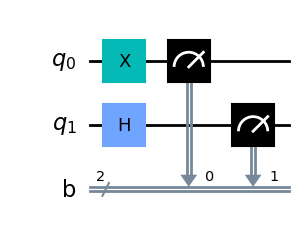

In [8]:
circuit.draw(output='mpl', style='clifford')

# circuit.draw(output='text')

# style Name	Description
# 'default'	Standard style with wide gates and neutral colors
# 'iqx'	IBM Quantum Experience style (colorful)
# 'clifford'	Highlights Clifford gates
# 'bw'	Black and white style (for print)

## Execute on a Backend

{'11': 520, '01': 504}


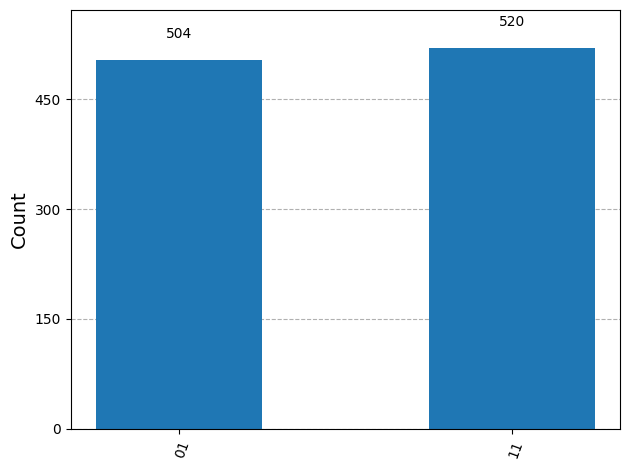

In [9]:
# Use AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
# Get the counts
counts = result.get_counts()
print(counts)

# Plot histogram
plot_histogram(counts)